# **Ex1 - Unsupervised learning**

## Names and IDs

1.   List item
2.   List item

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
from datetime import datetime

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [24]:
# load the data
def read_csv_from_googledrive(url):
  if(url.startswith("https://drive.google.com/uc?id=")):
    return pd.read_csv(url)
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  df=pd.read_csv(url)
  return df

df=read_csv_from_googledrive("https://drive.google.com/file/d/1AuB_8rpY5E7_6Hk_e5OnIcM9a170U39o/view?usp=sharing")

analyz_df = df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
plt.style.use('fivethirtyeight')

### Preprosesing

In [26]:
# Convert 'Year_Birth' to datetime and calculate age
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Age'] = (datetime.now() - df['Year_Birth']).astype('<m8[Y]')
df['Num_Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Year_Birth','Dt_Customer','ID','Kidhome','Teenhome'], axis = 1)
df = df.drop(['AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3'], axis = 1)
df.dropna(subset=['Income'], inplace = True)

df_plot = df[(df['Age'] > 0) & (df['Age'] < 100) & (df['Income'] <= 120000)] # Filter the DataFrame based on conditions

in below we examining the distribution of age and income in the data

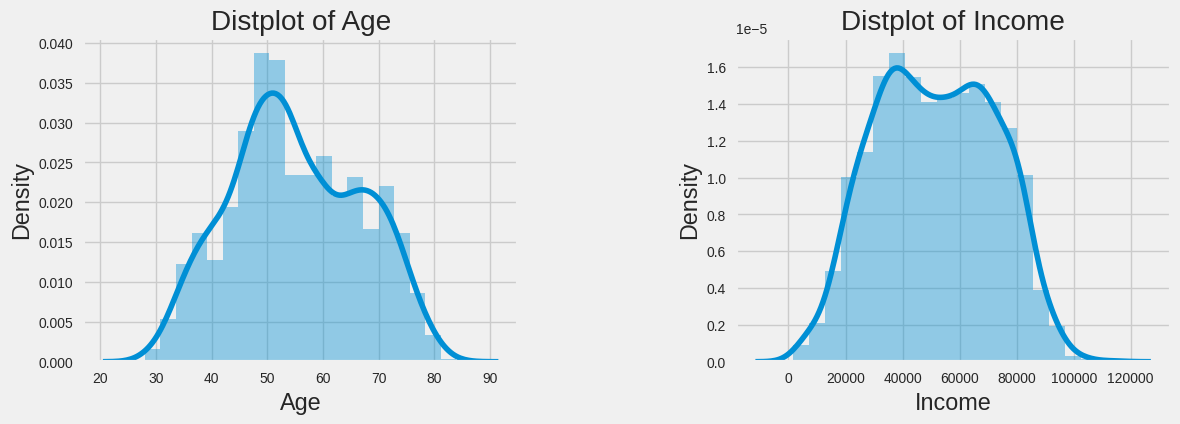

In [27]:
# Graph 1 -
plt.figure(1, figsize=(20, 4))
n = 0
for x in ['Age' , 'Income']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_plot[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

**Insight** - The distribution of our data correctly reflects the real world, there is no bias here for a certain age or a certain income


---



in below we examining the relationship between MntWines and Income and Marital_Status

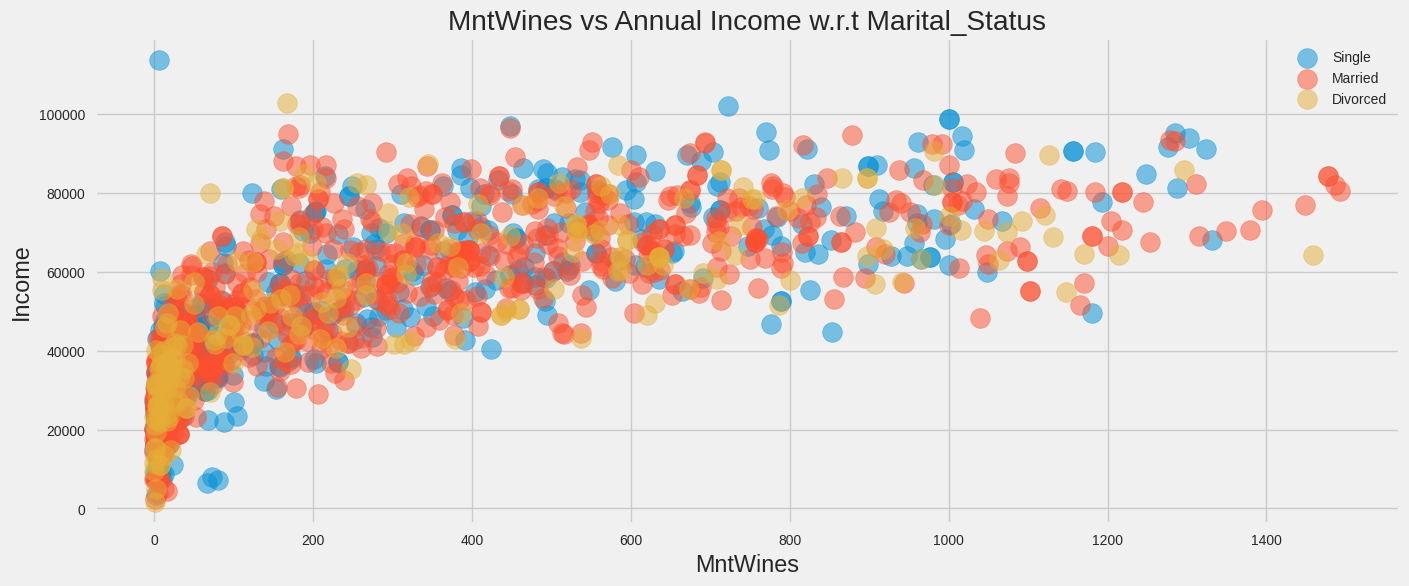

In [28]:
# Graph 2 -
plt.figure(1 , figsize = (15 , 6))
for Marital_Status in ['Single' , 'Married', 'Divorced']:
    plt.scatter(x = 'MntWines' , y = 'Income' , data = df_plot[df_plot['Marital_Status'] == Marital_Status] ,
                s = 200 , alpha = 0.5 , label = Marital_Status)
plt.xlabel('MntWines'), plt.ylabel('Income')
plt.title('MntWines vs Annual Income w.r.t Marital_Status')
plt.legend()
plt.show()

**Insight** - we can see that the more income there is, the more wine people buy, and in addition, the rich single buy the most



---



In below we examining the relationship between matital status to th average amount of each product they buy

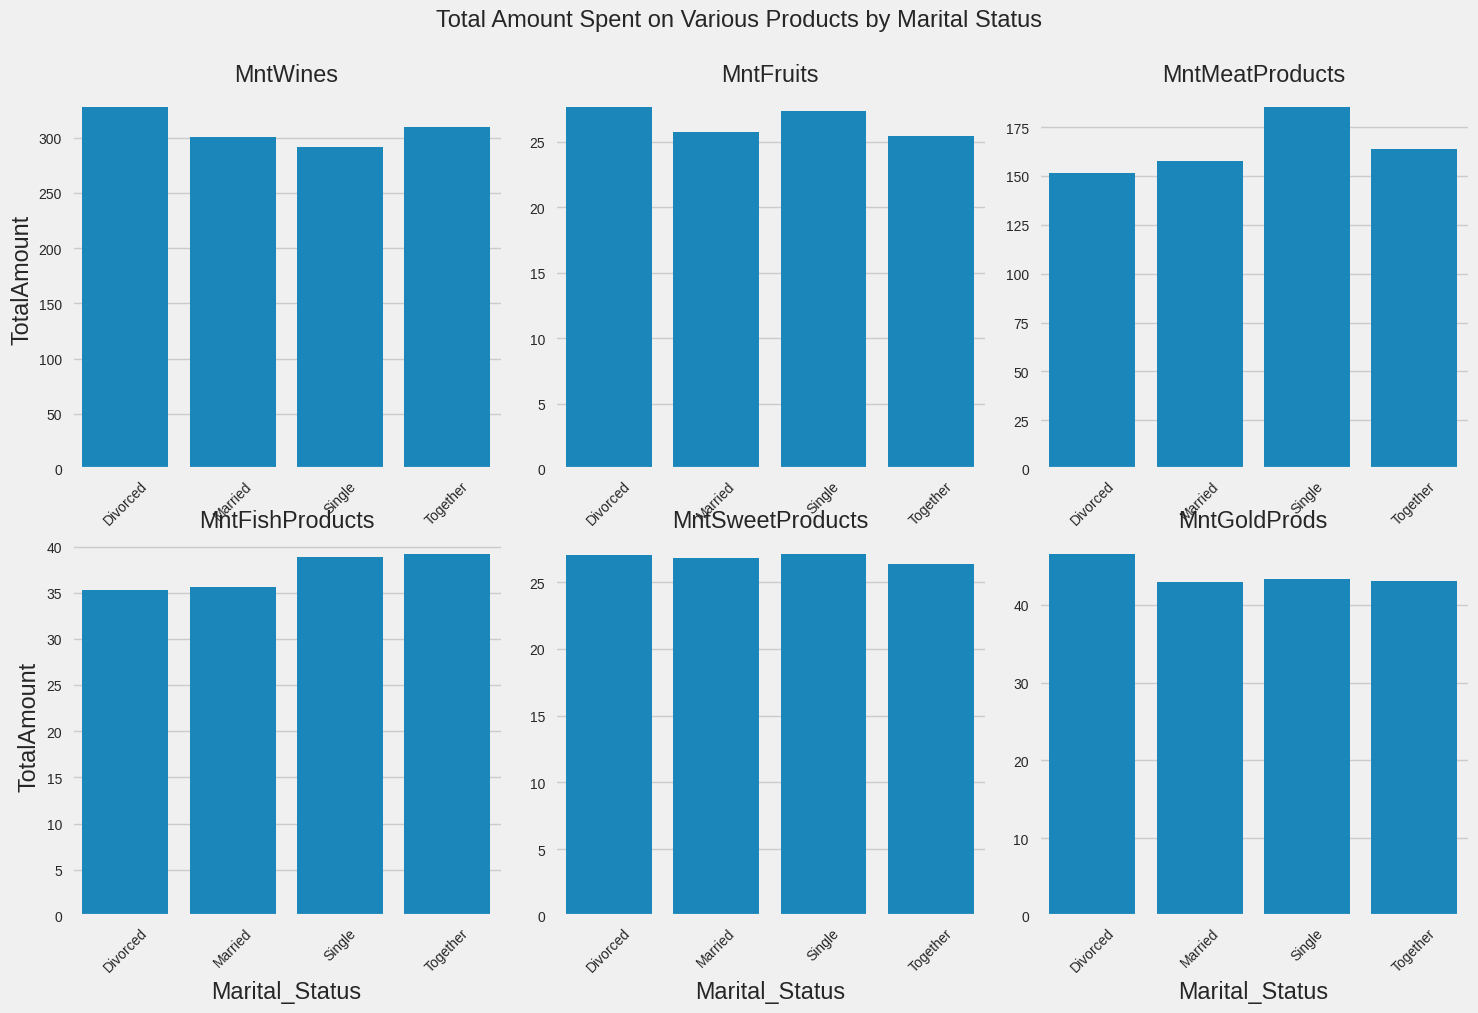

In [29]:
# Graph 3 -
mask = df_plot["Marital_Status"].isin(['Divorced' , 'Married' , 'Single' , 'Together'])
filterd = df_plot[mask]

grouped = filterd.groupby("Marital_Status")[['MntWines'  ,'MntFruits' ,'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds' ]].mean().reset_index()

melted = grouped.melt(id_vars="Marital_Status", var_name="Product", value_name="TotalAmount")

g = sns.FacetGrid(melted, col="Product", col_wrap=3, sharex=False, sharey=False, height=5)


g.map(sns.barplot, "Marital_Status", "TotalAmount")


g.set_xticklabels(rotation=45)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=1)
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle("Total Amount Spent on Various Products by Marital Status", fontsize=17, y=0.98)

plt.show()



**Insight** - we can see that in each matrial status there isnt a big diff between the categories, the average of prucase is almost the same in each product

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [30]:
# load the data
df_k_means = df

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df_k_means['Marital_Status'] = label_encoder.fit_transform(df_k_means['Marital_Status'])
df_k_means['Education'] = label_encoder.fit_transform(df_k_means['Education'])

# Scale the data using MinMaxScaler
columns_to_scale = ['MntWines', 'Recency' ,'MntFruits' ,'MntMeatProducts' ,
                    'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds',
                    'Age', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Num_Children', 'Marital_Status', 'Education']
# Create a MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the specified columns and transform the data
df_k_means[columns_to_scale] = scaler.fit_transform(df_k_means[columns_to_scale])

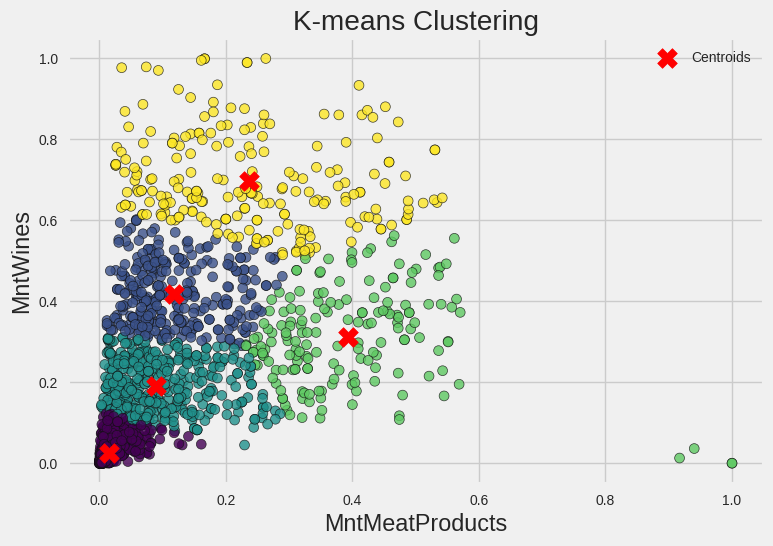

In [32]:
# Choose the optimal number of clusters based on the Elbow Method or your analysis
n_clusters = 5  # You can change this to your selected number of clusters
X2 = df_k_means[['MntMeatProducts' , 'MntWines']].iloc[: , :].values
# Fit k-means model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X2)

# Predict cluster labels
labels = kmeans.predict(X2)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plotting
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('MntMeatProducts')
plt.ylabel('MntWines')
plt.legend()
plt.show()

### Elbow

k_means on all the features

In [33]:
X3 = df_k_means
sum_squared_dis = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X3)
    sum_squared_dis.append(algorithm.inertia_)

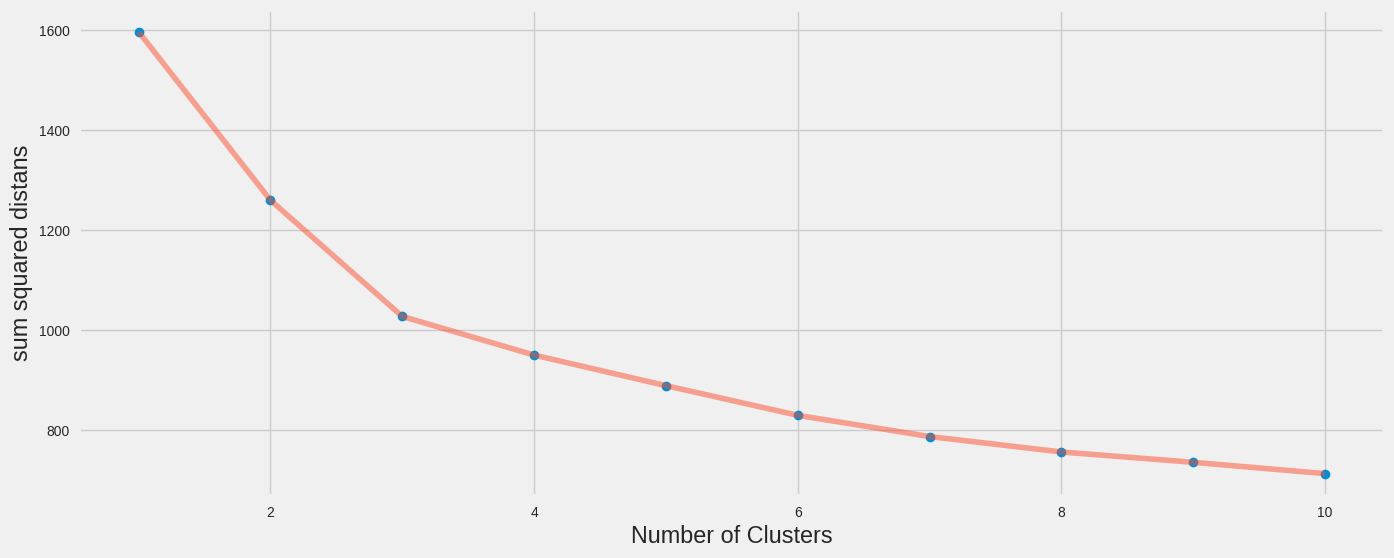

In [34]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , sum_squared_dis , 'o')
plt.plot(np.arange(1 , 11) , sum_squared_dis , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('sum squared distans')
plt.show()

Here it's look like the best K is 3

### Silhouette Score

In [35]:
from sklearn.metrics import silhouette_score

X4 = df_k_means
Silhouette_Scores = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n))
    labels = algorithm.fit_predict(X4)
    Silhouette_Scores.append(silhouette_score(X4, labels))

optimal_k = Silhouette_Scores.index(max(Silhouette_Scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


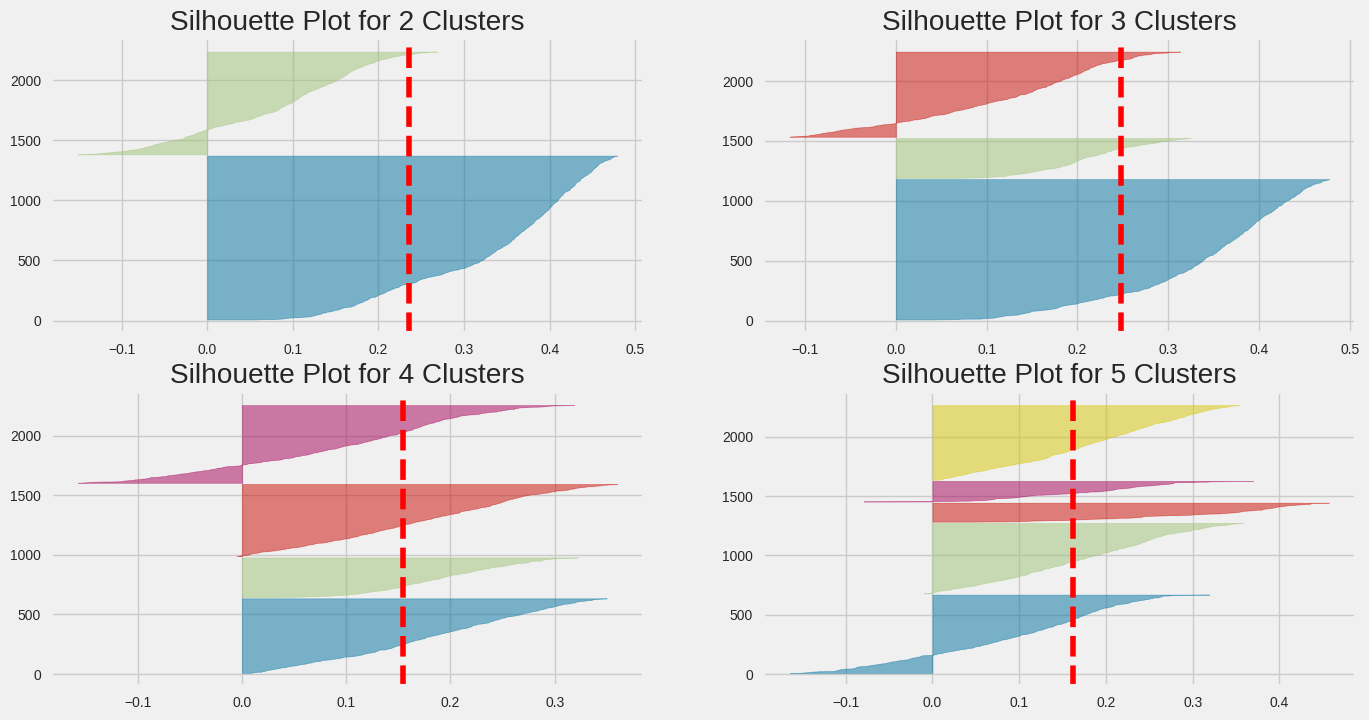

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Set up the figure for plotting
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with the KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])

    visualizer.fit(X4)
    ax[q-1][mod].set_title(f'Silhouette Plot for {i} Clusters')


## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





In [37]:
df_pca = df_k_means

# label_encoder = LabelEncoder()
# df_pca['Marital_Status'] = label_encoder.fit_transform(df_pca['Marital_Status'])
# df_pca['Education'] = label_encoder.fit_transform(df_pca['Education'])

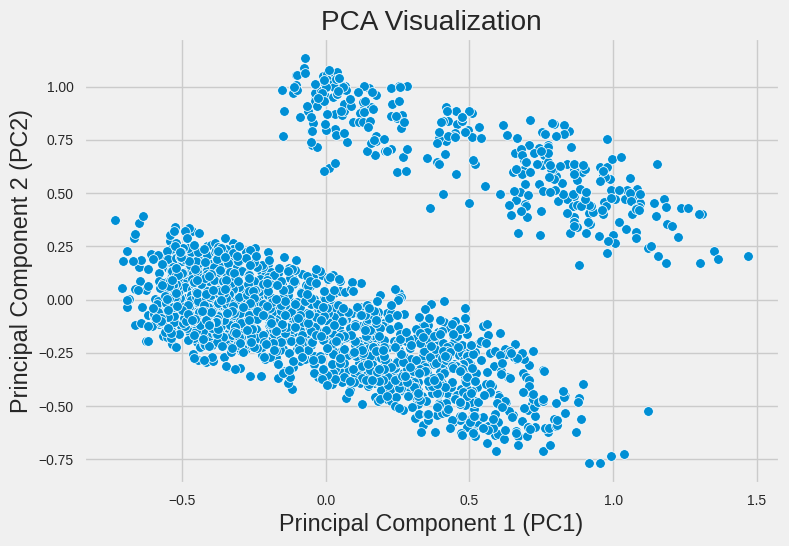

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardizing the features
# X = df_pca.values
# X = StandardScaler().fit_transform(X)
X= df_pca
# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principalComponents = pca.fit_transform(X)

# Create a DataFrame with principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Plotting the PCA
sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDf)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

In [39]:
print(pca.explained_variance_ratio_)

[0.27663349 0.17790064]


**Q**: What is the variance explained in the 2 component PCA?

**A**: [0.27663349 0.17790064]

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [40]:
X = df_pca
# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principalComponents = pca.fit_transform(X)

# Create a DataFrame with principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

### Elbow

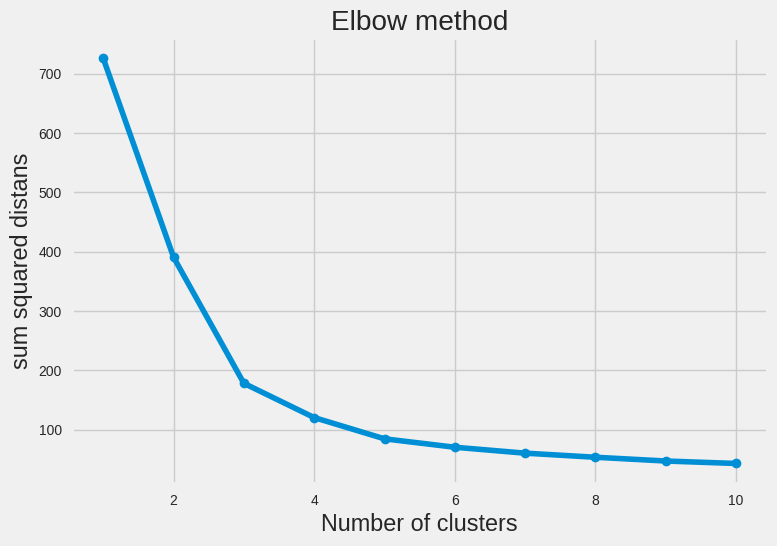

In [41]:
sum_squared_dis = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, random_state= 111)
    k_means.fit(principalDf)
    sum_squared_dis.append(k_means.inertia_)

plt.plot(range(1,11), sum_squared_dis, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sum squared distans')
plt.show()

Here it's look like the best K is 3

### Silhouette

In [42]:
Silhouette_Score2 = []
for i in range(2,11):
    k_means = KMeans(n_clusters=i, random_state= 111)
    k_means.fit(principalDf)
    labels = k_means.predict(principalDf)
    score = silhouette_score(principalDf, labels)
    Silhouette_Score2.append(score)

optimal_k2 = Silhouette_Score2.index(max(Silhouette_Score2)) + 2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


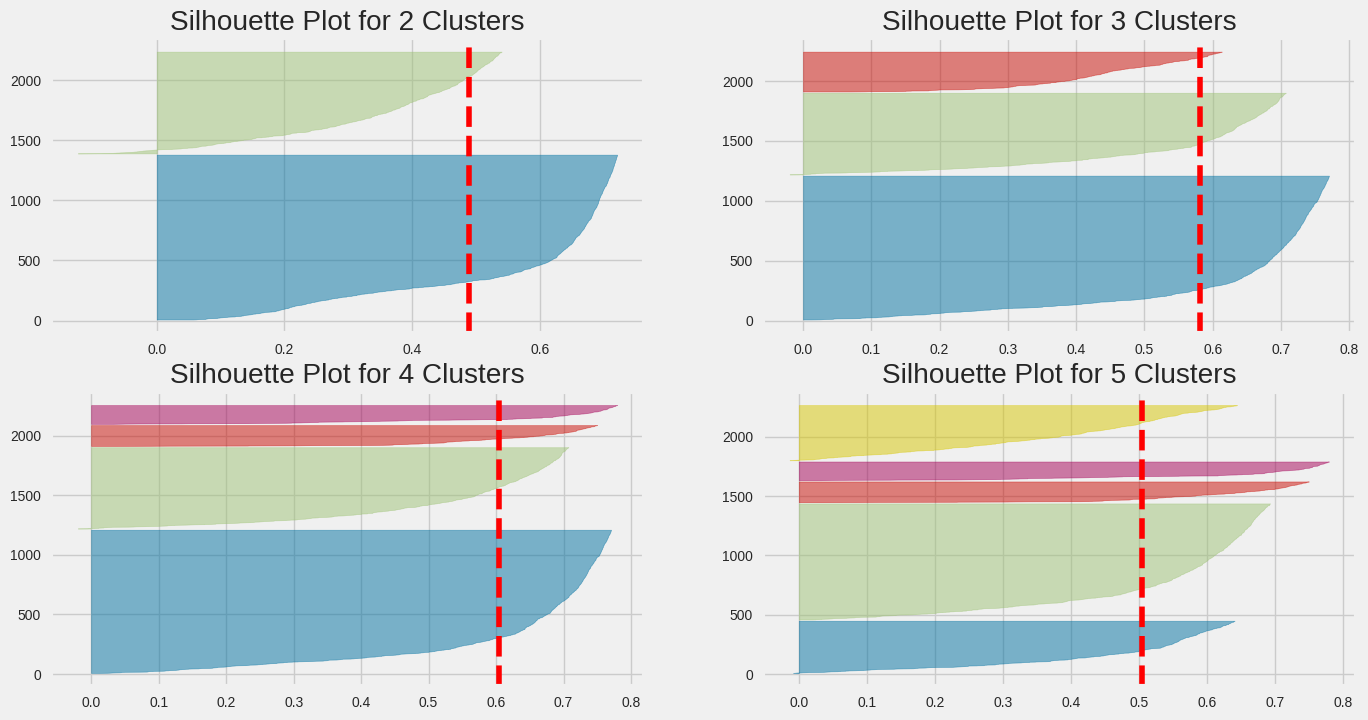

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Set up the figure for plotting
fig, ax = plt.subplots(2, 2, figsize=(15,8))

# Loop over a range of cluster numbers
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-2, 2)  # Adjust the index for subplot

    # Create SilhouetteVisualizer instance with the KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])

    # Fit the visualizer
    visualizer.fit(principalDf)

    # Add a title to each subplot
    ax[q][mod].set_title(f'Silhouette Plot for {i} Clusters')


**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:  This is because K-means works with division into circular clusters, so here it will divide it like this and not the way we see (in a straight line)

Text(0, 0.5, 'Amount Spent on Meat Products')

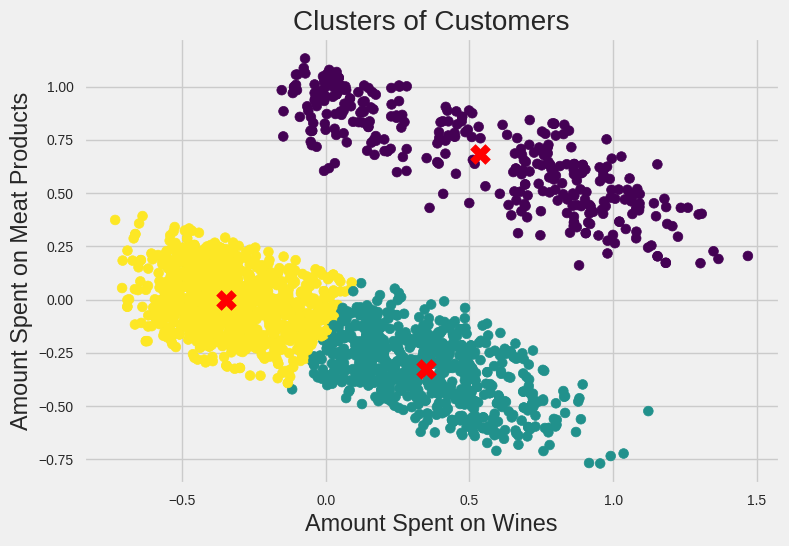

In [44]:
k_means= KMeans(n_clusters=3 , random_state= 111)
k_means.fit(principalDf)
labels = k_means.predict(principalDf)


# Visualize the clusters
plt.scatter(x= principalDf['principal component 1'], y = principalDf['principal component 2'], c=labels, cmap='viridis')
centroids = k_means.cluster_centers_

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # 's' is the size of the marker

# Adding titles and labels
plt.title('Clusters of Customers')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Amount Spent on Meat Products')




---



## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











1.  
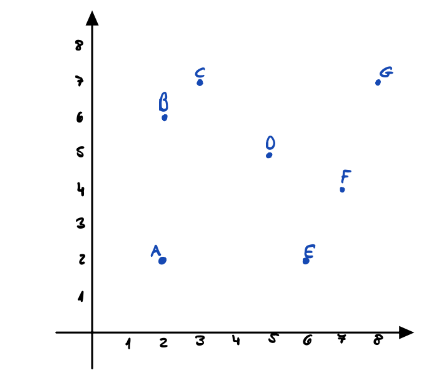

2.  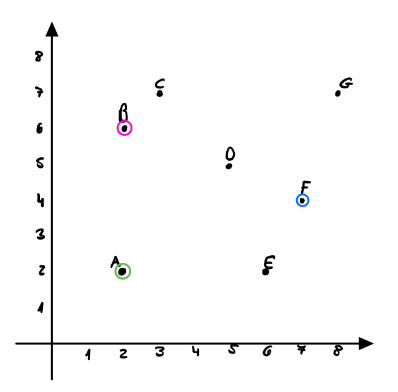

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



1.  
   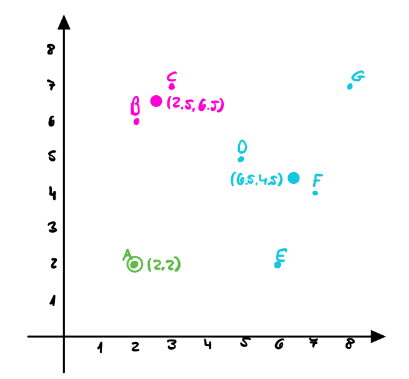

2. No, the result will be the same even if we choose different centers. The centers will move until they reach the last iteration we reached.
*We note that there can be very rare cases with specific data that can produce different results

3. Businesses can use K-means to segment customers into groups based on purchasing behavior, demographics, or engagement patterns. This allows for more targeted marketing strategies, personalized advertising, and improved customer service.



---



## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

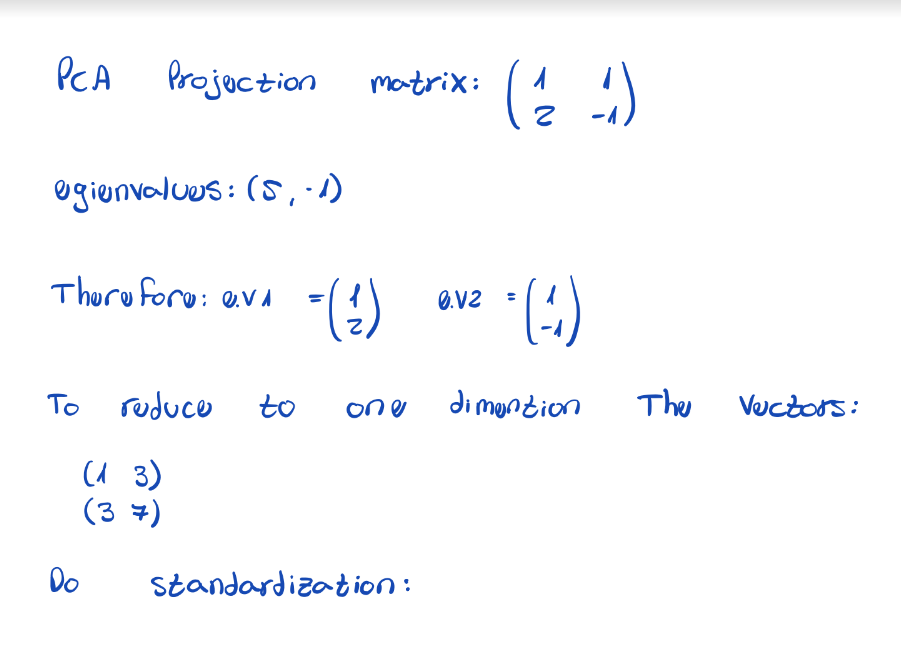



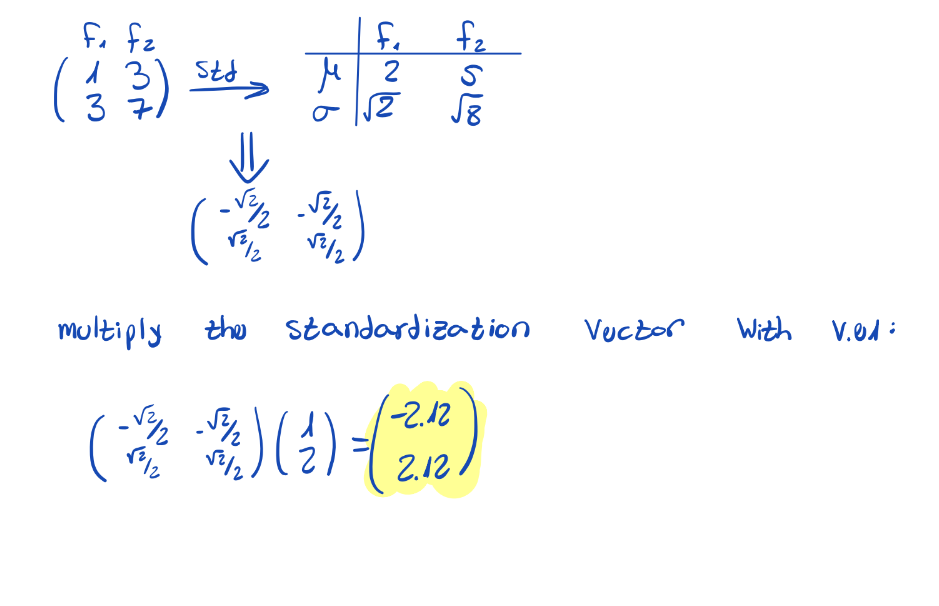